In [3]:
import tensorflow as tf

'1.13.1'

In [22]:
mnist = tf.keras.datasets.mnist #28*28 images of hand-written 0-9
(x_train,y_train),(x_test,y_test)=mnist.load_data()

x_train=tf.keras.utils.normalize(x_train, axis=1)
x_test=tf.keras.utils.normalize(x_test, axis=1)

model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train,y_train,epochs=3)

val_loss,val_accuracy=model.evaluate(x_test,y_test)
print(val_loss,val_accuracy)

Epoch 1/3
60000/60000 [==============================] - 7s 123us/sample - loss: 0.2632 - acc: 0.9226
Epoch 2/3
60000/60000 [==============================] - 7s 123us/sample - loss: 0.1055 - acc: 0.9678
Epoch 3/3
10000/10000 [==============================] - 1s 56us/sample - loss: 0.0984 - acc: 0.9702
0.09839801759552211 0.9702


[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

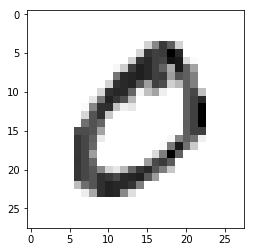

In [14]:
import matplotlib.pyplot as plt
plt.imshow(x_train[1], cmap=plt.cm.binary)
#plt.show()
print(x_train[0])

In [29]:
import numpy as np
predictions=model.predict([x_test])
y_pred_bool = np.argmax(predictions, axis=1)

In [31]:
import sklearn.metrics as skmetric
print(skmetric.classification_report(y_test, y_pred_bool))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.96      0.97      0.97      1010
           4       0.98      0.95      0.97       982
           5       0.98      0.95      0.97       892
           6       0.98      0.97      0.98       958
           7       0.95      0.98      0.97      1028
           8       0.98      0.94      0.96       974
           9       0.94      0.96      0.95      1009

   micro avg       0.97      0.97      0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [39]:
print(np.argmax(predictions[12]))

9


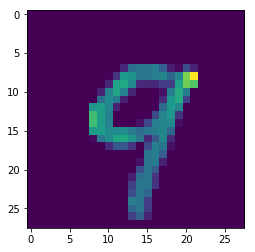

In [40]:
plt.imshow(x_test[12])
plt.show()